<a href="https://colab.research.google.com/github/Haniaakanwal/DIP-TASK/blob/main/Task11/DIP_Task11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# MORPHOLOGICAL OPERATIONS - STEP 1: IMPORT LIBRARIES

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Libraries imported successfully!")


Libraries imported successfully!


Please upload a binary or grayscale image (PNG, JPG, etc.):


Saving task11.webp to task11.webp
Uploaded Image: task11.webp


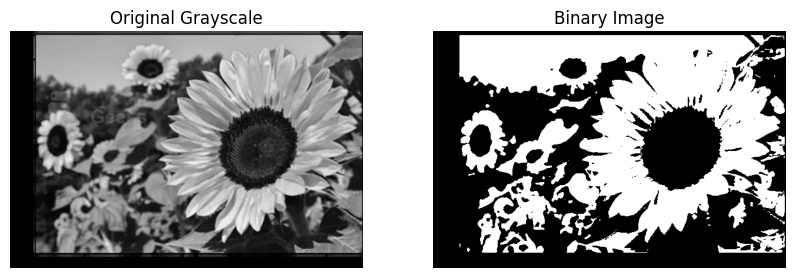

In [ ]:
# STEP 2: IMAGE UPLOAD AND BINARY CONVERSION

print("Please upload a binary or grayscale image (PNG, JPG, etc.):")
uploaded = files.upload()
image_name = list(uploaded.keys())[0]
print("Uploaded Image:", image_name)

# Read as grayscale
img = cv2.imread(image_name, cv2.IMREAD_GRAYSCALE)

# Convert to binary image (threshold = 127)
_, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display original and binary image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis('off')

plt.show()


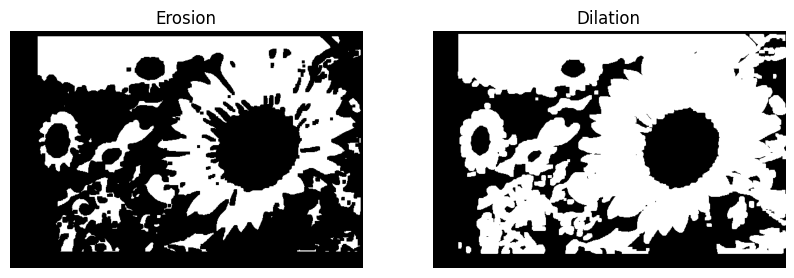

In [ ]:
# STEP 3: EROSION & DILATION

# Structuring element (5x5)
kernel = np.ones((5,5), np.uint8)

# Erosion
erosion = cv2.erode(binary, kernel, iterations=1)

# Dilation
dilation = cv2.dilate(binary, kernel, iterations=1)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(erosion, cmap='gray')
plt.title("Erosion")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(dilation, cmap='gray')
plt.title("Dilation")
plt.axis('off')
plt.show()


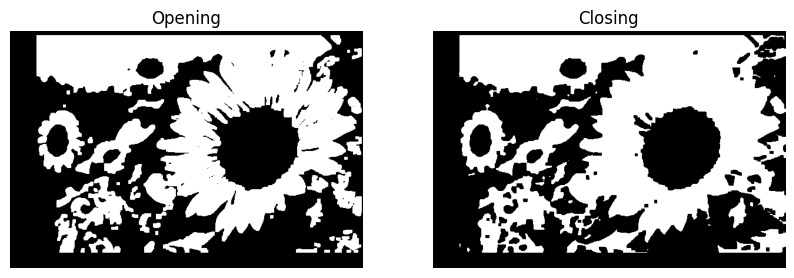

In [ ]:

# STEP 4: OPENING & CLOSING
# Opening (erosion followed by dilation)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(opening, cmap='gray')
plt.title("Opening")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(closing, cmap='gray')
plt.title("Closing")
plt.axis('off')
plt.show()


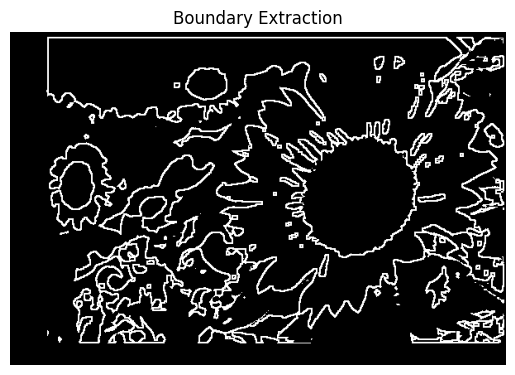

In [ ]:
# STEP 5: BOUNDARY EXTRACTION
# Boundary = Original - Erosion

boundary = binary - erosion

plt.imshow(boundary, cmap='gray')
plt.title("Boundary Extraction")
plt.axis('off')
plt.show()


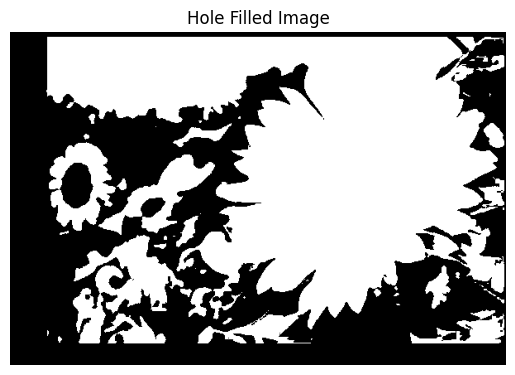

In [ ]:
# ============================================
# STEP 6: HOLE FILLING
# ============================================

# Invert image
inv = cv2.bitwise_not(binary)

# Marker image (set border pixels)
marker = np.zeros_like(inv)
marker[0, :] = inv[0, :]
marker[-1, :] = inv[-1, :]
marker[:, 0] = inv[:, 0]
marker[:, -1] = inv[:, -1]

# Iterative reconstruction by dilation
prev = marker.copy()
while True:
    dilated = cv2.dilate(prev, kernel)
    reconstructed = cv2.min(dilated, inv)
    if np.array_equal(reconstructed, prev):
        break
    prev = reconstructed

filled = cv2.bitwise_not(reconstructed)

plt.imshow(filled, cmap='gray')
plt.title("Hole Filled Image")
plt.axis('off')
plt.show()


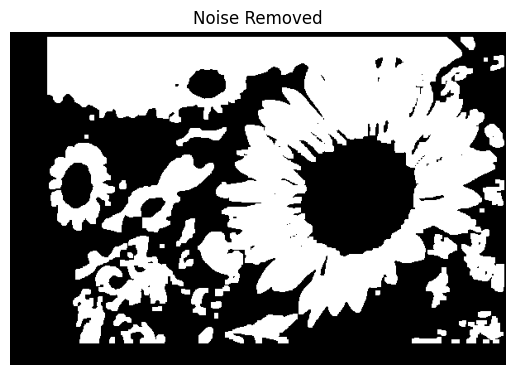

In [ ]:
# ============================================
# STEP 7: NOISE REMOVAL
# ============================================

# Remove small noise using opening
noise_removed = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.imshow(noise_removed, cmap='gray')
plt.title("Noise Removed")
plt.axis('off')
plt.show()


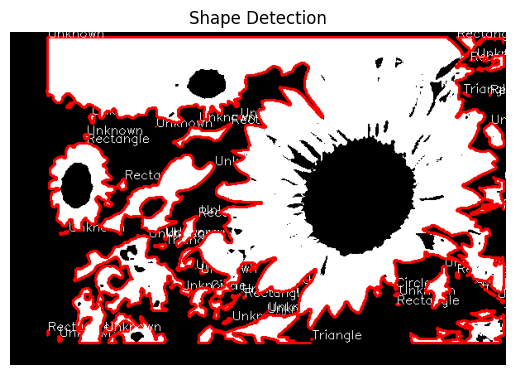

In [ ]:
# ============================================
# STEP 8: SHAPE DETECTION
# ============================================

# Convert binary image to color for visualization
shape_img = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.04 * cv2.arcLength(cnt, True), True)

    if len(approx) == 3:
        shape = "Triangle"
    elif len(approx) == 4:
        shape = "Rectangle"
    elif len(approx) > 6:
        shape = "Circle"
    else:
        shape = "Unknown"

    cv2.drawContours(shape_img, [cnt], -1, (255,0,0), 2)
    x, y = approx[0][0]
    cv2.putText(shape_img, shape, (x, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)

plt.imshow(shape_img)
plt.title("Shape Detection")
plt.axis('off')
plt.show()


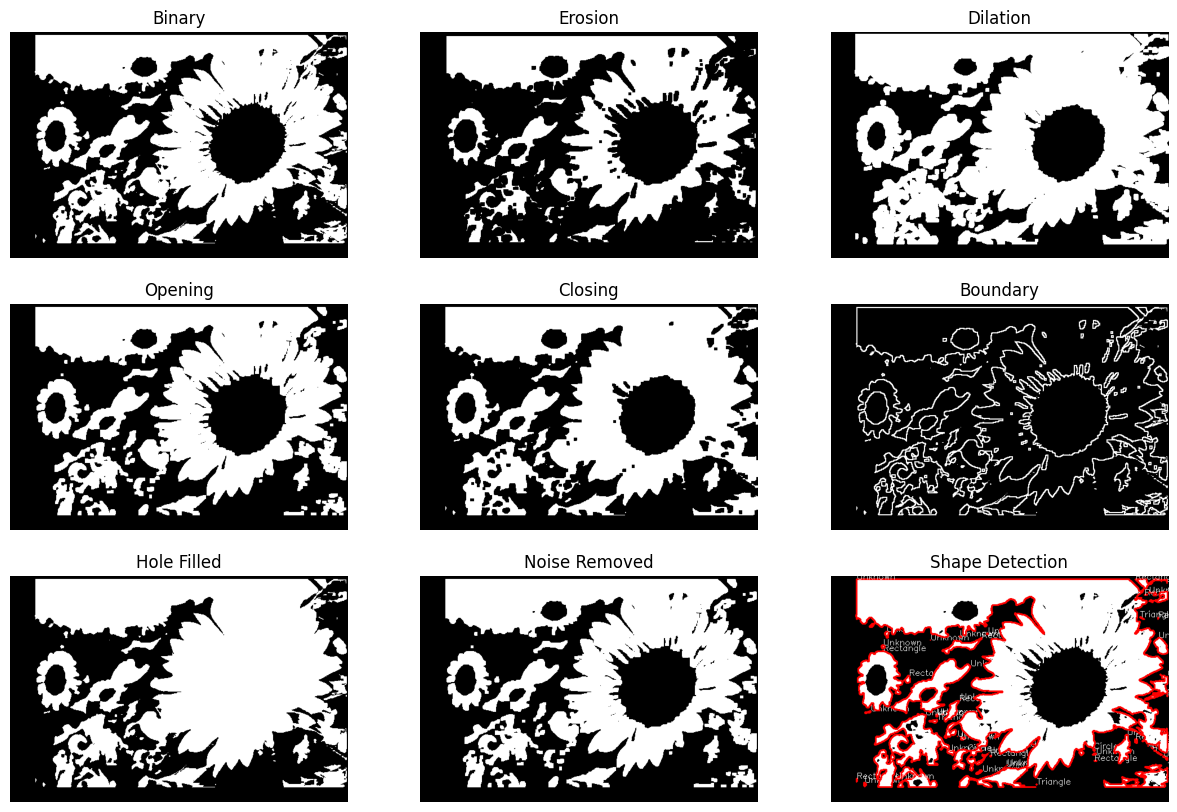

In [ ]:
# ============================================
# STEP 9: DISPLAY ALL RESULTS
# ============================================

titles = [
    "Binary", "Erosion", "Dilation",
    "Opening", "Closing", "Boundary",
    "Hole Filled", "Noise Removed", "Shape Detection"
]

images = [
    binary, erosion, dilation,
    opening, closing, boundary,
    filled, noise_removed, shape_img
]

plt.figure(figsize=(15,10))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.show()
